In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# connecting the data

file_path = ('D:\\DS\\SQL Exam\\olist_data.csv')
data = pd.read_csv(file_path)

In [3]:
# making sure the data can be read

data.head()

,product_id,seller_id,category_name,city,price,freight_value,order_purchase_timestamp
0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,cool_stuff,volta redonda,58.90,13.29,2017-09-13 08:59:02
1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,pet_shop,sao paulo,239.90,19.93,2017-04-26 10:53:06
2,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,moveis_decoracao,borda da mata,199.00,17.87,2018-01-14 14:33:31
3,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,perfumaria,franca,12.99,12.79,2018-08-08 10:00:35
4,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,ferramentas_jardim,loanda,199.90,18.14,2017-02-04 13:57:51


In [4]:
# Checking for data info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   product_id                112650 non-null  object 
 1   seller_id                 112650 non-null  object 
 2   category_name             111047 non-null  object 
 3   city                      112650 non-null  object 
 4   price                     112650 non-null  float64
 5   freight_value             112650 non-null  float64
 6   order_purchase_timestamp  112650 non-null  object 
dtypes: float64(2), object(5)
memory usage: 6.0+ MB


In [5]:
# Looks like its fine, we already change the datatype in SQL
# let's check for missing values

data.isnull().sum()

product_id                     0
seller_id                      0
category_name               1603
city                           0
price                          0
freight_value                  0
order_purchase_timestamp       0
dtype: int64

In [6]:
# Considerable number of nulls in category_name column, let's see do we need to do something about it

null_col = data['category_name']
X = null_col.isnull().sum()
Y = null_col.count()
calc_percent = (X / Y * 100).round(1)
print(calc_percent)

1.4


In [7]:
# Seems like the null values is below 1.5%
# but just to be rigorous, we will treat the null values

category_col = null_col.value_counts()
print(category_col)

cama_mesa_banho                  11115
beleza_saude                      9670
esporte_lazer                     8641
moveis_decoracao                  8334
informatica_acessorios            7827
                                 ...  
cds_dvds_musicais                   14
la_cuisine                          14
pc_gamer                             9
fashion_roupa_infanto_juvenil        8
seguros_e_servicos                   2
Name: category_name, Length: 73, dtype: int64


In [8]:
# let's replace the missing category values by just inserting the most mentioned category name

data['category_name'].fillna('cama_mesa_banho', inplace = True)

In [9]:
# let's check again

data.isnull().sum()

product_id                  0
seller_id                   0
category_name               0
city                        0
price                       0
freight_value               0
order_purchase_timestamp    0
dtype: int64

In [10]:
# lets check for duplicated values
# I think we dont need to check for duplicates values since people can always order the same thing from an e-commerce
# hence I insert an order_purchase_timestamp on the dataset, its impossible for the same people ordering / selling the same stuff in the exact hour & seconds

duplicates = data.duplicated(keep=False).sum()
duplicates_percent = (duplicates / data.count() * 100).round(1)
print(f'number of duplicates: {duplicates}')
print(duplicates_percent)

number of duplicates: 17373
product_id                  15.4
seller_id                   15.4
category_name               15.4
city                        15.4
price                       15.4
freight_value               15.4
order_purchase_timestamp    15.4
dtype: float64


In [11]:
# quite significant number, let's eliminate it, and store the changes into the main dataset

data.drop_duplicates(keep= False, inplace= True)

# and let's recheck it on the main data

duplicates = data.duplicated(keep=False).sum()
duplicates_percent = (duplicates / data.count() * 100).round(1)
print(f'number of duplicates: {duplicates}')
print(duplicates_percent)

number of duplicates: 0
product_id                  0.0
seller_id                   0.0
category_name               0.0
city                        0.0
price                       0.0
freight_value               0.0
order_purchase_timestamp    0.0
dtype: float64


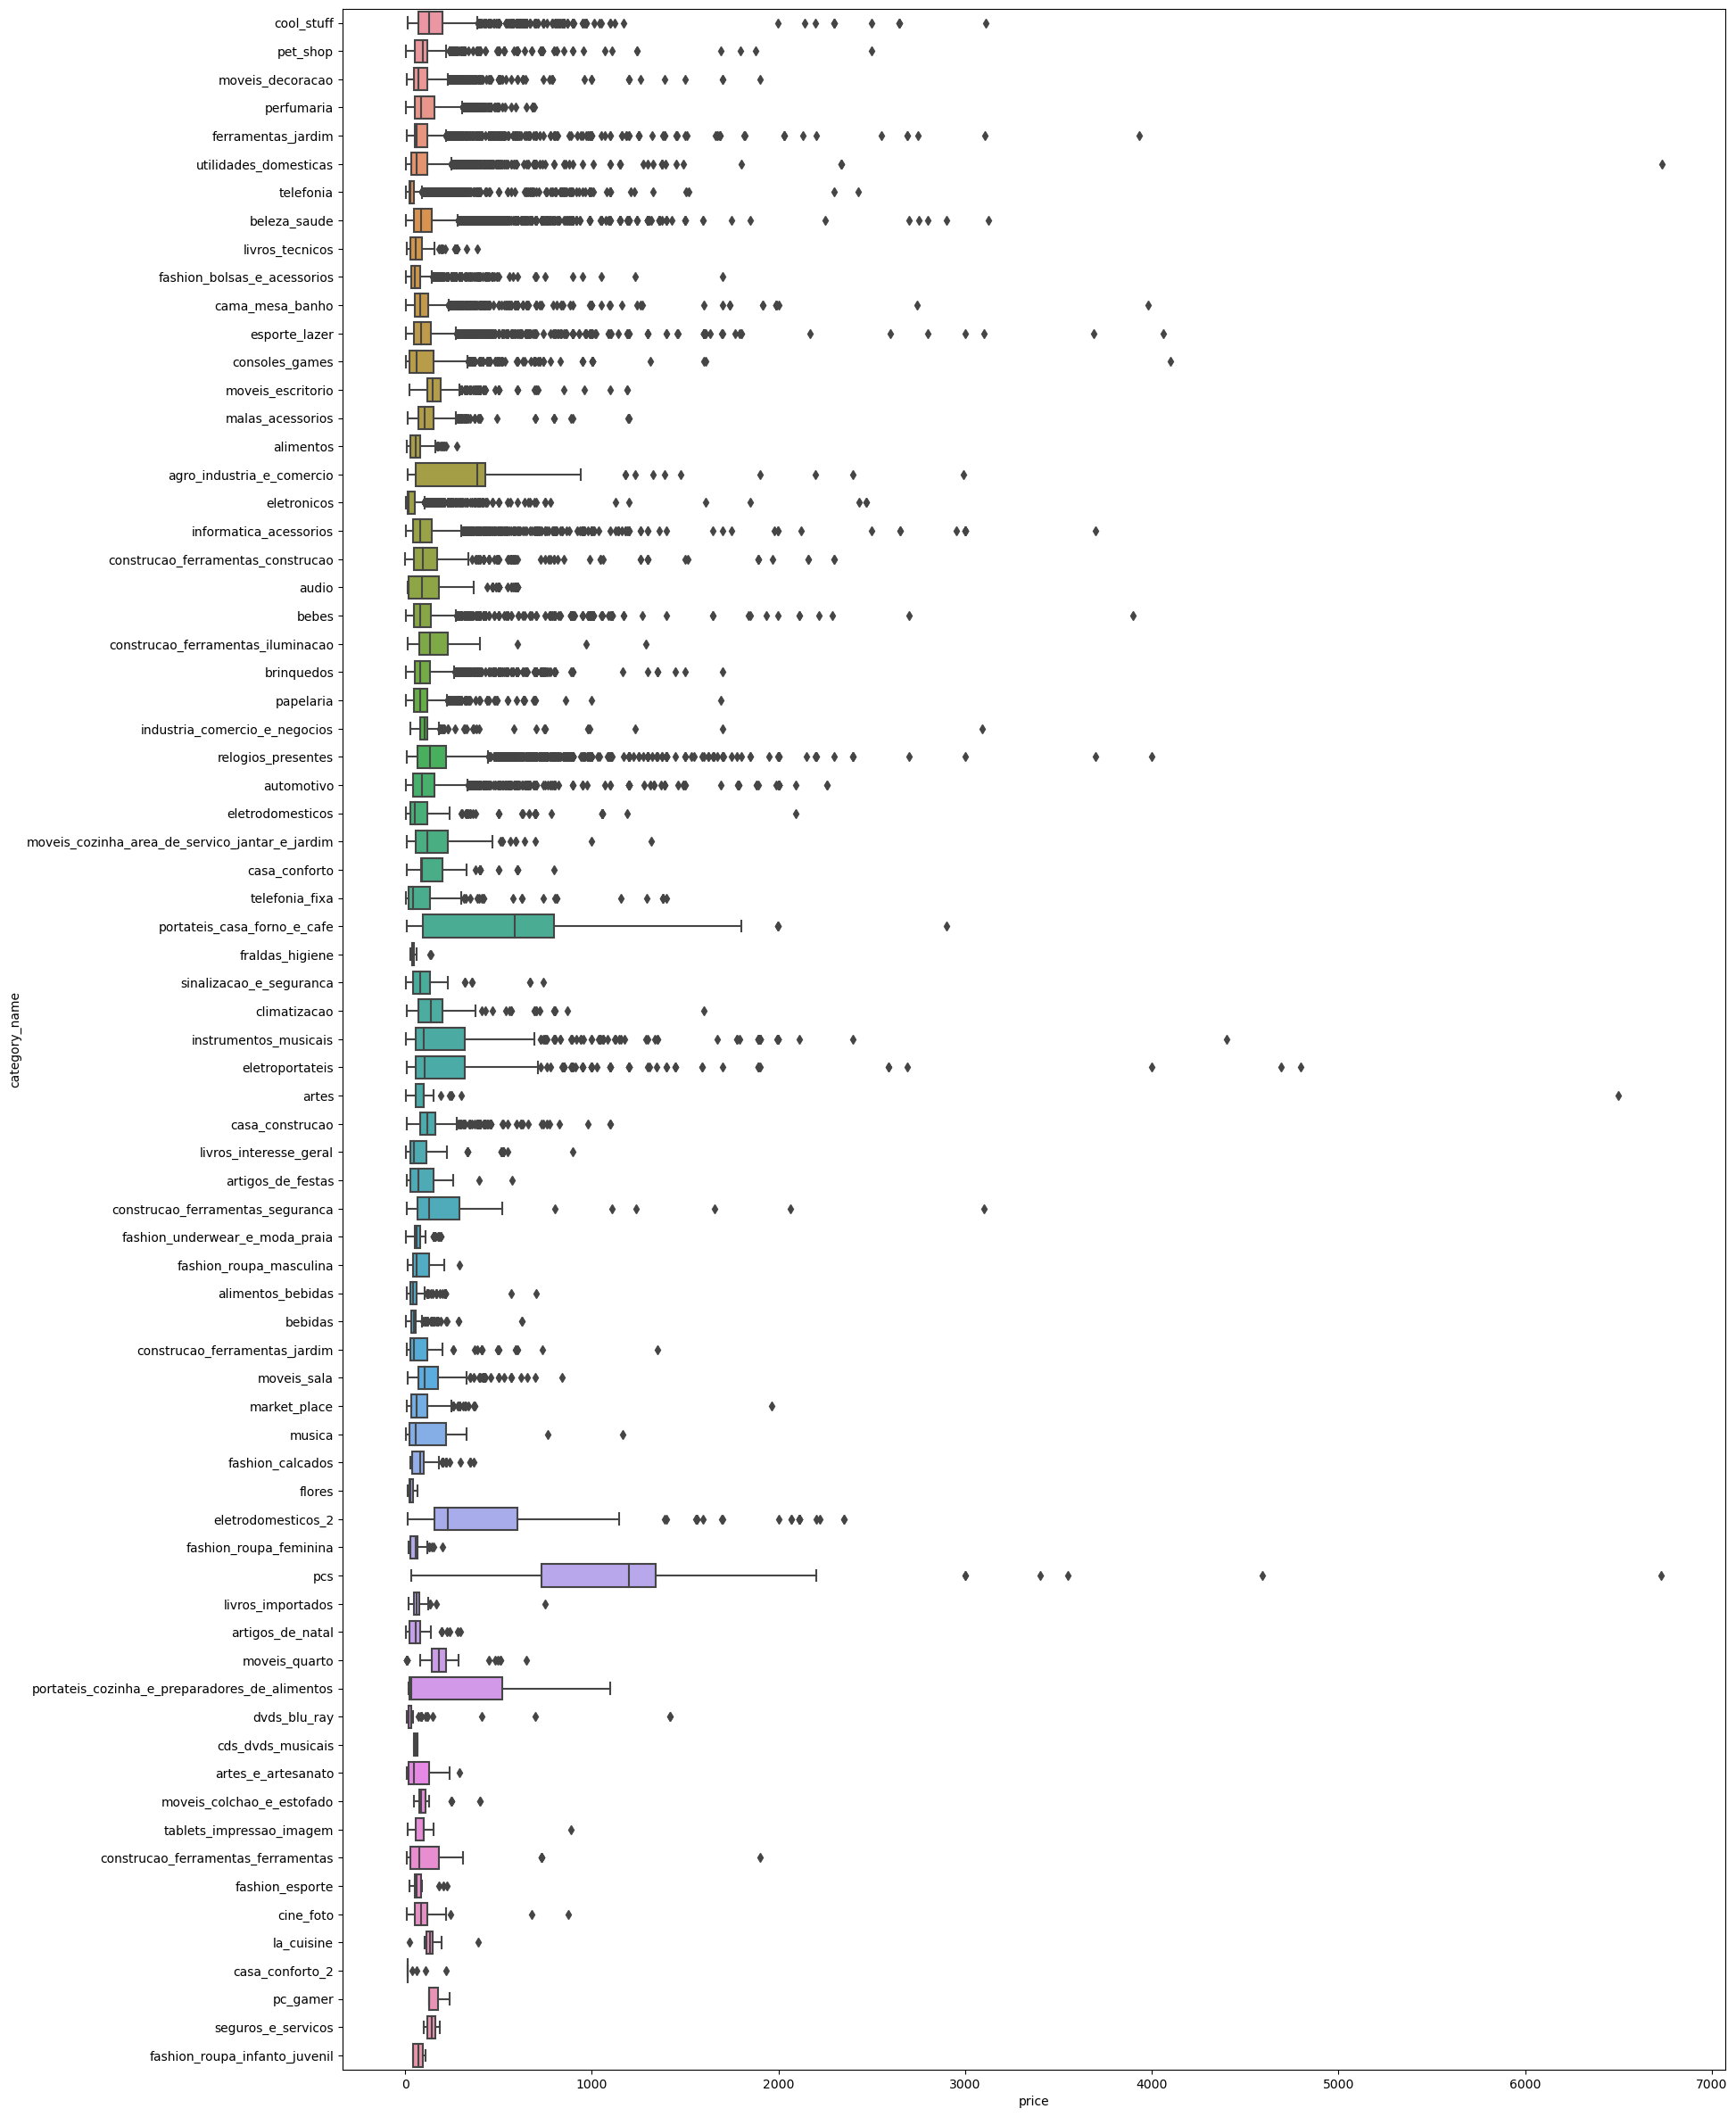

In [47]:
# for outlier, it best if we focus our attention on the prices since it'll affect our analysis


fig, ax = plt.subplots(figsize=(20, 30))
boxplt_price = sns.boxplot(data, x = 'price', y = 'category_name', ax=ax)

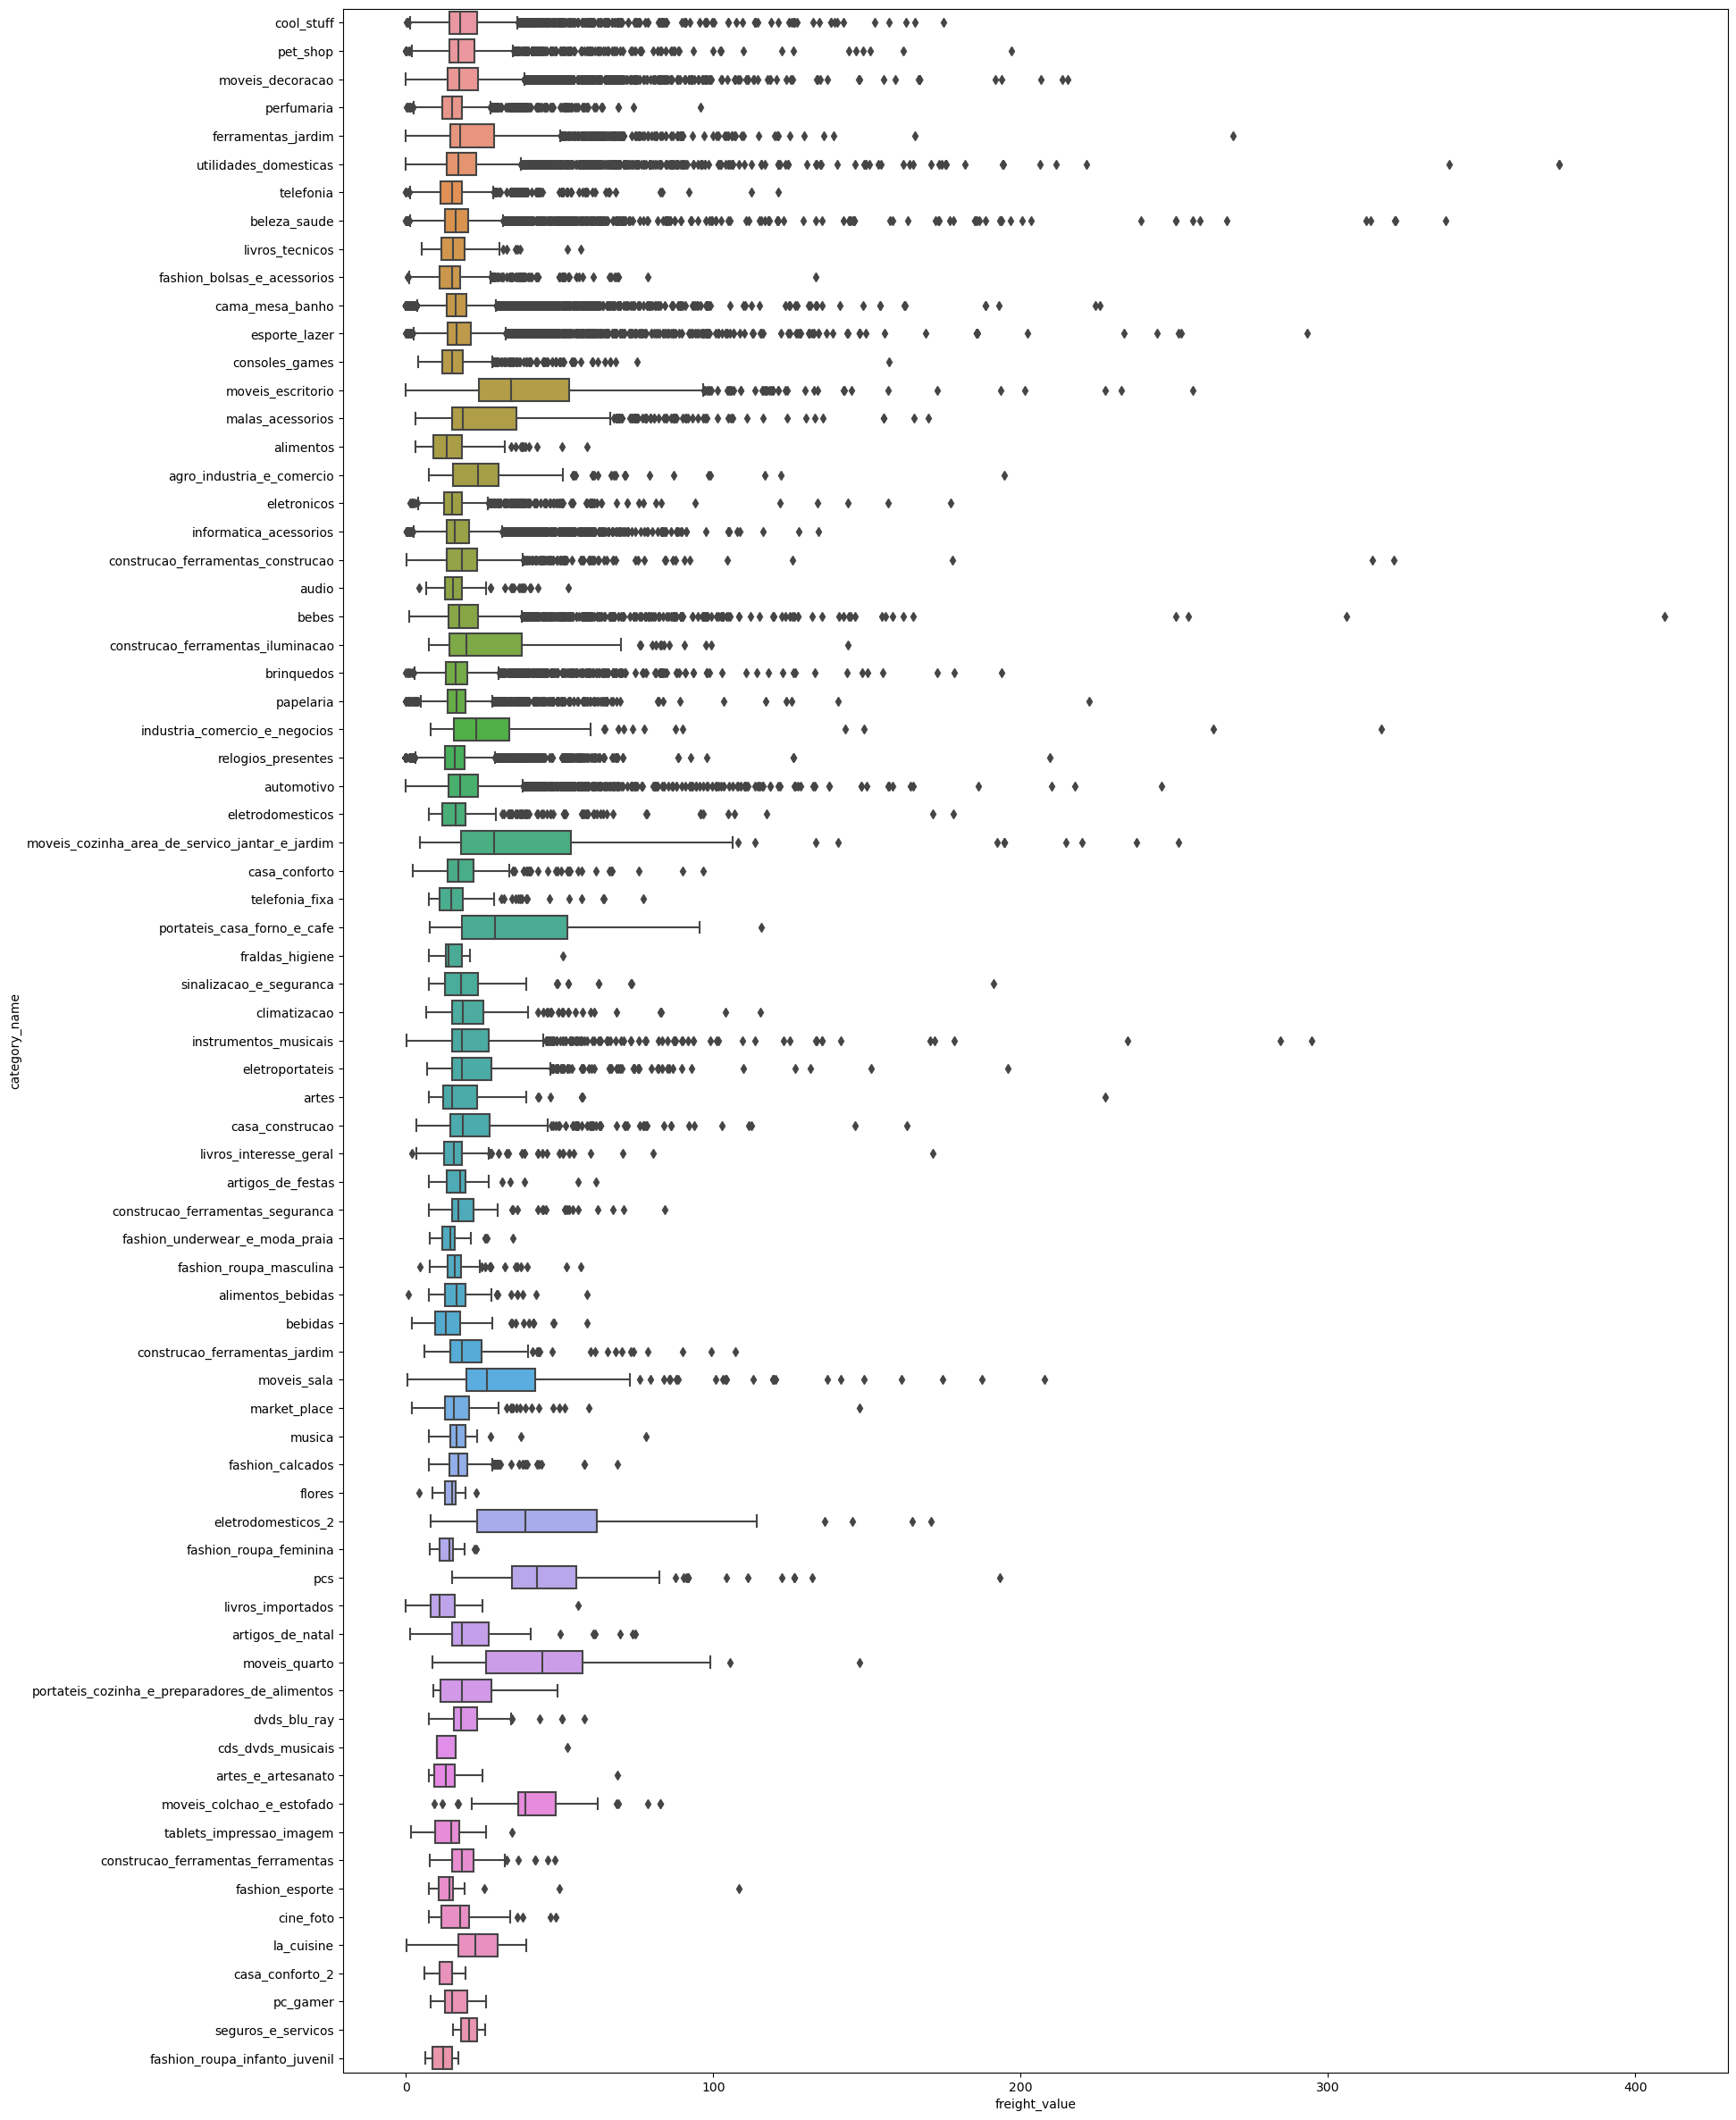

In [48]:
fig, ax = plt.subplots(figsize=(20, 30))
boxplt_price = sns.boxplot(data, x = 'freight_value', y = 'category_name', ax=ax)

In [81]:
# calculating price outliers

z_scores = (data['price'] - data['price'].mean()) / data['price'].std()

# let's set the z-scores threshold number to 3, and calculate the % from total data

outliers_price = (z_scores.abs() > 3).sum()
print(f'outliers in price is: {outliers_price}')
print(f'percentage of price outliers in the data is: {(outliers_price / len(data) * 100).round(1)}')

outliers in price is: 1641
percentage of price outliers in the data is: 1.7


In [82]:
# calculating price outliers

z_scores = (data['freight_value'] - data['freight_value'].mean()) / data['freight_value'].std()

# let's set the z-scores threshold number to 3, and calculate the % from total data

outliers_freight = (z_scores.abs() > 3).sum()
print(f'outliers in freight value is: {outliers_freight}')
print(f'percentage of freight value outliers in the data is: {(outliers_freight / len(data) * 100).round(1)}')

outliers in freight value is: 1709
percentage of freight value outliers in the data is: 1.8


In [ ]:
# we wont be manipulating the price dataset since we are calculating overall revenue share
# but we will be manipulating freight value dataset since we want to calculate average cost